<h3>Importing Libraries</h3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from parquet files for each day into a single DataFrame
data_frames = []
for day in range(1, 32):  # Assuming days 1 through 31
    filename = f"Data/2019-07-{day}.parquet"
    df = pd.read_parquet(filename)
    data_frames.append(df)

# Concatenate all the data frames into a single DataFrame
full_data = pd.concat(data_frames, ignore_index=True)


In [ ]:
full_data

,date,category,device,stake,time,win
0,2019-07-01,102,2,100.0,204645,0.0
1,2019-07-01,102,2,130.0,155634,0.0
2,2019-07-01,102,2,100.0,51318,0.0
3,2019-07-01,102,2,4100.0,113254,8200.0
4,2019-07-01,102,2,100.0,71322,0.0
...,...,...,...,...,...,...
1439443,2019-07-31,103,2,1000.0,115056,1600.0
1439444,2019-07-31,101,2,50.0,10734,0.0
1439445,2019-07-31,103,2,600.0,213609,200.0
1439446,2019-07-31,103,2,55.0,759,200.0


1.

In [ ]:
# Display basic statistics
print(full_data.describe())

           category        device         stake          time           win
count  1.439448e+06  1.439448e+06  1.439448e+06  1.439448e+06  1.439448e+06
mean   1.019310e+02  1.990403e+00  3.821383e+02  1.296890e+05  3.672105e+02
std    9.250776e-01  9.749526e-02  2.869764e+03  7.228048e+04  9.017258e+03
min    1.010000e+02  1.000000e+00  5.000000e+01  0.000000e+00  0.000000e+00
25%    1.010000e+02  2.000000e+00  6.000000e+01  7.281100e+04  0.000000e+00
50%    1.020000e+02  2.000000e+00  1.000000e+02  1.350360e+05  2.000000e+01
75%    1.030000e+02  2.000000e+00  1.950000e+02  1.937150e+05  1.250000e+02
max    1.050000e+02  2.000000e+00  1.000000e+05  2.359590e+05  1.650000e+06


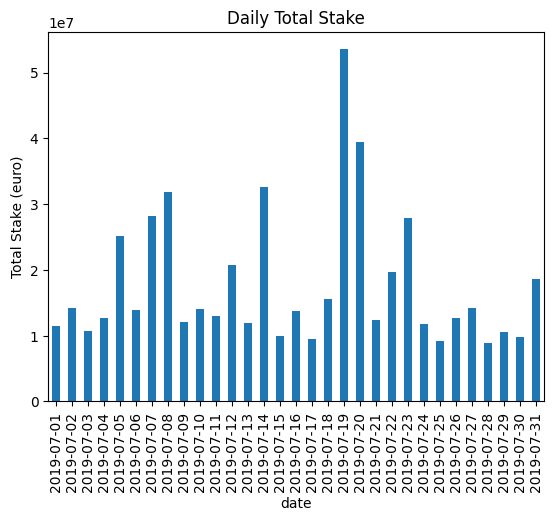

In [ ]:
# Plot daily trend of total amount spent on bets
daily_total_spent = full_data.groupby('date')['stake'].sum()
daily_total_spent.plot(kind='bar', title='Daily Total Stake')
plt.ylabel('Total Stake (euro)')
plt.show()

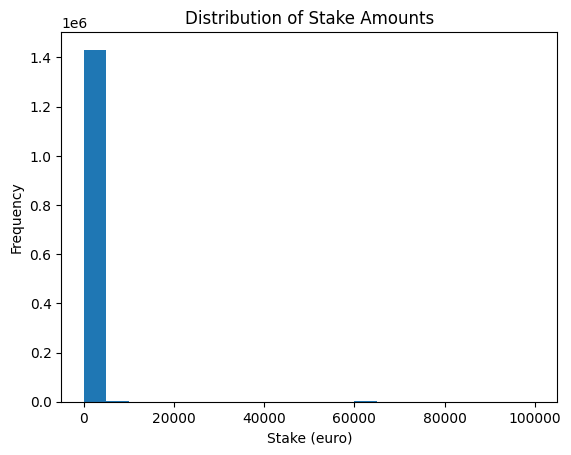

In [ ]:
# Plot distribution of stakes
plt.hist(full_data['stake'], bins=20)
plt.title('Distribution of Stake Amounts')
plt.xlabel('Stake (euro)')
plt.ylabel('Frequency')
plt.show()

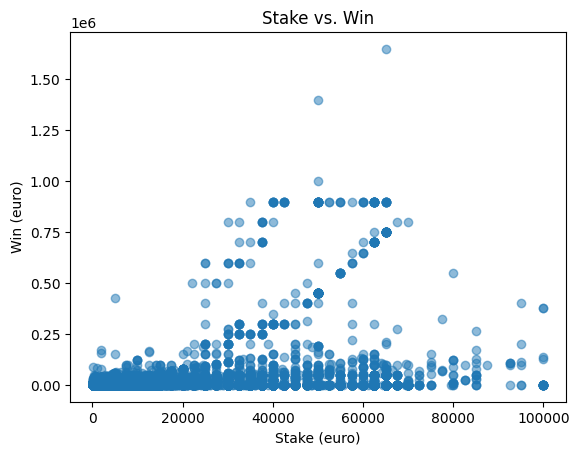

In [ ]:
# Plot scatter plot of stake vs. win
plt.scatter(full_data['stake'], full_data['win'], alpha=0.5)
plt.title('Stake vs. Win')
plt.xlabel('Stake (euro)')
plt.ylabel('Win (euro)')
plt.show()

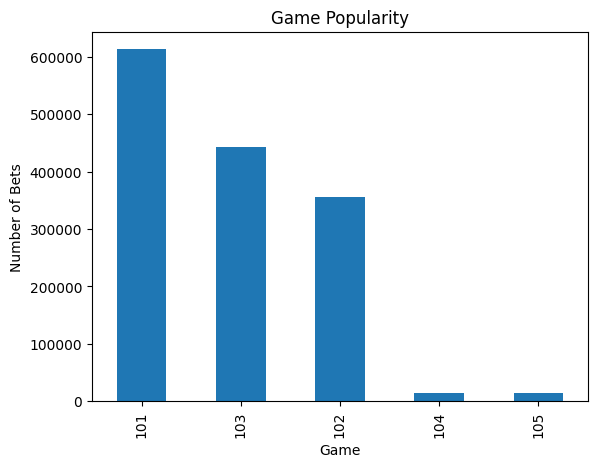

In [ ]:
# Plot distribution of games played
game_counts = full_data['category'].value_counts()
game_counts.plot(kind='bar', title='Game Popularity')
plt.xlabel('Game')
plt.ylabel('Number of Bets')
plt.show()

2.

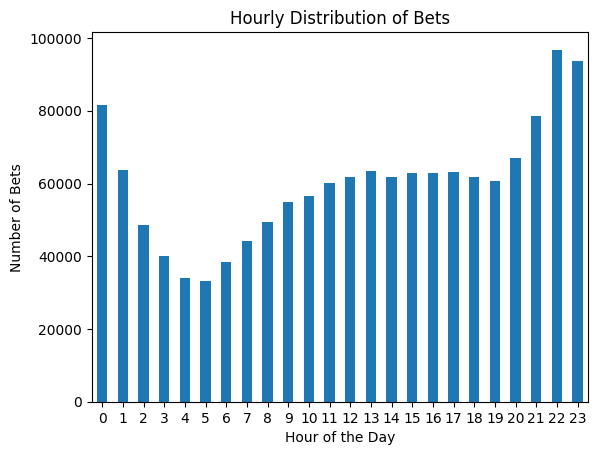

The majority of bets are made in hour: 22


In [ ]:
# Convert the 'time' column to a string and then to datetime format
full_data['time'] = full_data['time'].astype(str).str.zfill(6)
full_data['time'] = pd.to_datetime(full_data['time'], format='%H%M%S')

# Extract the hour from the datetime 'time' column
full_data['hour'] = full_data['time'].dt.hour

# Count the number of bets for each hour
hourly_bets = full_data['hour'].value_counts().sort_index()

# Plot the distribution of bets across hours
hourly_bets.plot(kind='bar', title='Hourly Distribution of Bets')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bets')
plt.xticks(rotation=0)
plt.show()

# Find the hour with the maximum number of bets
max_hour = hourly_bets.idxmax()
print(f"The majority of bets are made in hour: {max_hour}")

3.

In [ ]:


# Concatenate all the data frames into a single DataFrame
full_data = pd.concat(data_frames, ignore_index=True)

# Calculate profit for each row
full_data['profit'] = full_data['stake'] - full_data['win']

# Calculate total profit for each game
game_profit = full_data.groupby('category')['profit'].sum()

# Find the game with the highest total profit
most_profitable_game = game_profit.idxmax()
total_profit = game_profit.max()

print(f"The most profitable game is Game {most_profitable_game} with a total profit of {total_profit:.2f} euro.")


The most profitable game is Game 103 with a total profit of 13308195.00 euro.
